# `fytok.Tokamak`


## 介绍

`fytok.Tokmak` 用于执行集成工作流。不在 IMAS DD 的 IDS 定义之内，它包含多个 Module/IDS/Actor，通过驱动 Module 根据物理逻辑更新演化，实现集成建模功能。

## `class Tokamak(Actor)`

```{eval-rst}
.. autoclass:: fytok.Tokamak.Tokamak
    :members: brief_summary,title,tag, refresh,
    :undoc-members: wall, tf, pf_active, magnetics, equilibrium, core_profiles, core_transport, core_sources, transport_solver
    :special-members: __init__
    :member-order: bysource
    :show-inheritance: True
```


## 示例

## 创建 Tokamak 实例

初始化信息包括

| 参数                               | 解释                                                                                                                                                                                                |
| ---------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| "f""                | 数据源。指向一个 geqdsk 文件(file+geqdsk://...)，提供平衡信息,或者数据源的entry入口                                                                                                                                                          |
| device="name"                      | 指定装置名称。根据装置名称，可以自动调取装置的静态信息，例如，wall.limiter 的几何形状，pf_active.coils 极向场线圈的位置等等。默认支持的装置信息，括 EAST、ITER 和 D3D，可通过配置文件扩展其他装置。 |
| shot=900003 ，                     | 指定放电的炮号。若数据源包含实验数据库，会自动读取相应的炮号作为数据。                                                                                                                              |
| run=0                              | 指定模拟运行的编号。若数据源中包含可写入的是模拟数据库，写入模拟结果是会作为数据 index 的一部分。                                                                                                   |
| equilibrium={"code.name: "fy_eq" } | 指定子模块 equilibrium 的初始化信息。其中 code.name="fy_eq"，意为调用路径 `fytok.modules.equilibrium.fy_eq` 下的插件                                                                                |
| transport_solver={"code.name: "fy_trans" } | 指定子模块 transport_solver 的初始化信息。其中 code.name="fy_trans"，意为调用路径 `fytok.modules.equilibrium.fy_trans` 下的插件                                                                                |
| core_sources={"code.name: "genray" } | 指定子模块 core_sources 的初始化信息。其中 code.name="genray"，意为调用第三方物理模块genray                                                                                |
| core_transport="model": [ {"code": {"name": "dummy"}},,] | 指定子模块 core_transport 的初始化信息。其中 code.name意在调用计算输运系数的模块                                                                              |
| ...... | ......   |

`tok.refresh(time=5.0)` 指定时间。若数据源中包含实验或者模拟数据库，则会查找最接近的时间片导入。


In [1]:
from fytok.Tokamak import Tokamak

tok = Tokamak("file+geqdsk://./data/g070754.05000", device="east", shot=70754, run=0)

2024-04-23 09:23:57,895 [    spdm]     INFO: 
###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences)
            
 url: https://gitee.com/openfusion/fytok_tutorial 
      https://github.com/fusion-yun/fytok_tutorial

 version = alpha  (spdm=beta extension=0.2.3.dev0+g2cc21ff.d20240223, imas_version=v3_38_1_dirty)

 Run by salmon at 2024-04-23T09:23:57.760186.
 Job ID: fytok_salmon_surface_3676

###################################################################################################

2024-04-23 09:23:58,038 [    spdm]     INFO: Load module spdm.plugins.data.plugin_geqdsk
2024-04-23 09:23:58,059 [    spdm]     INFO: Load module spdm.plugins.data.plugin_xml


## 展示概要信息

展示模拟的概要信息，包括 
- 装置名称、炮号、运行序号，
- 使用者、运行环境、运行时间、采用的 Ontology 版本
- 调用的模块信心

In [2]:
tok.transport_solver.code

2024-04-23 09:23:58,087 [    spdm]     INFO: Load module fytok.plugins.transport_solver_numerics.fy_trans
2024-04-23 09:23:58,091 [    spdm]     INFO: Initialize module fytok.plugins.transport_solver_numerics.FyTrans 


name='FyTrans'

In [3]:
print(tok.brief_summary)

2024-04-23 09:23:58,105 [    spdm]     INFO: Initialize module fytok.modules.DatasetFAIR 
2024-04-23 09:23:58,232 [    spdm]     INFO: Load module fytok.plugins.equilibrium.fy_eq
2024-04-23 09:23:58,233 [    spdm]     INFO: Initialize module fytok.plugins.equilibrium.FyEqAnalyze 
2024-04-23 09:23:58,236 [    spdm]     INFO: Initialize module fytok.modules.CoreTransport 
2024-04-23 09:23:58,239 [    spdm]     INFO: Initialize module fytok.modules.CoreSources 

###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences)
            
 url: https://gitee.com/openfusion/fytok_tutorial 
      https://github.com/fusion-yun/fytok_tutorial

 version = alpha  (spdm=beta extension=0.2.3.dev0+g2cc21f

## 可视化
### 适用于 JupyterLab 环境的可视化接口
FyTok 提供了适用于 JupyterLab 环境的可视化接口，`spdm.view.View.display()`调用。默认情况下，`Tokamak` 会将能够获取到的信息尽可能绘制到一张图上。如下图，展示了 pf_active 极向场线圈、magnetic 磁场探针，wall.limiter 壁, interferometer 干涉仪的几何信息，磁平衡信息给出了二维磁面的等高线，最外层磁面、磁轴、X-point等信息。

```{note} 
具有 IDS 可视化语义的 IDS 都应支持 `spdm.view.View.display()` 可视化，如 wall,pf_active,equilibrium。关于可视化库 spdm.view 的进一步细节请参考第二部分 SpDM 的可视化章节。
```

2024-04-23 09:23:58,251 [    spdm]     INFO: Load module spdm.view.view_matplotlib
2024-04-23 09:23:58,276 [    spdm]     INFO: Initialize module fytok.modules.Wall 
2024-04-23 09:23:58,281 [    spdm]     INFO: Load module spdm.mesh.mesh_rectangular
2024-04-23 09:23:58,345 [    spdm]     INFO: Initialize module fytok.modules.PFActive 
2024-04-23 09:23:58,370 [    spdm]     INFO: Initialize module fytok.modules.Magnetics 
2024-04-23 09:23:58,399 [    spdm]     INFO: Initialize module fytok.modules.Interferometer 
2024-04-23 09:23:58,413 [    spdm]     INFO: Initialize module fytok.modules.TF 


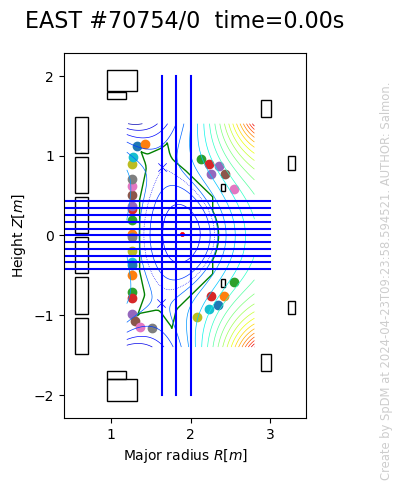

In [4]:
from spdm.view import  sp_view
fig=sp_view.display(tok)

## 将可视化结果输出为图像文件

通过指定输出文件路径 `output=f"output/{tok.tag}_rz.svg"`，可以将可视化结果以文件的形式保存。

In [5]:
sp_view.display(tok, title=tok.title, output=f"output/{tok.tag}_rz.svg")

2024-04-23 09:23:59,101 [    spdm]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/view/view_matplotlib.py:92:_figure_post: Write figure to  output/east_70754_0_000000_rz.svg


输出的文件如下

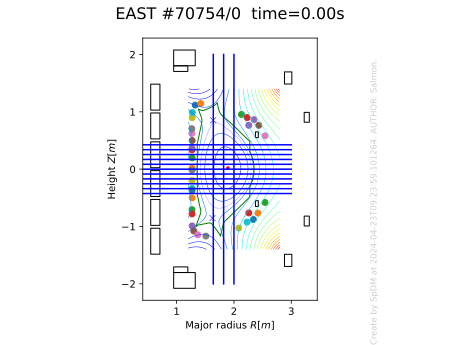

In [6]:
from IPython.core.display import SVG
SVG(f"output/{tok.tag}_rz.svg")